In [387]:
import pandas as pd
import numpy as np 
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [388]:
temp = pd.read_csv(r"C:\Users\alexa\OneDrive\Desktop\Finance Tut\temp.csv", parse_dates=["datetime"], index_col="datetime")

In [389]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [390]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [391]:
temp.iloc[0, 0]

11.7

In [392]:
temp.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [393]:
temp.index[2]

Timestamp('2013-01-01 02:00:00')

In [394]:
temp.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


In [395]:
import matplotlib.pyplot as plt

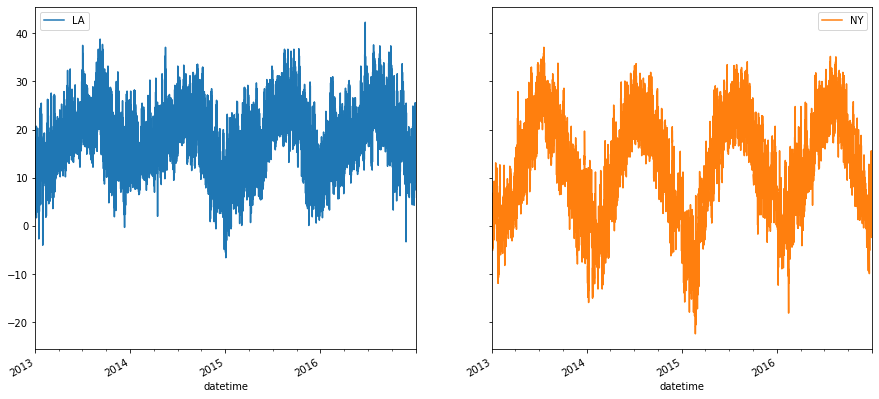

In [396]:
temp.plot(figsize = (15, 7), subplots=True, layout=(1, 2), sharey=True)
plt.show()

In [397]:
temp.loc["2013-01-01 01:00:00"]

LA    10.7
NY    -1.7
Name: 2013-01-01 01:00:00, dtype: float64

In [398]:
pd.date_range(start = "2015-07-01", end = "2015-07-31")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [399]:
pd.date_range(start = "2015-07-01", periods = 6, freq = "W-Wed")

DatetimeIndex(['2015-07-01', '2015-07-08', '2015-07-15', '2015-07-22',
               '2015-07-29', '2015-08-05'],
              dtype='datetime64[ns]', freq='W-WED')

In [400]:
#Obtaining the efficent frontier 
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()
import yfinance as yf

pf_data = yf.download(assets, start = "2010-01-01", end = "2021-10-01")
pf_data.tail()

[*********************100%***********************]  2 of 2 completed


Adj Close                    Close                     High  \
                    PG        ^GSPC          PG        ^GSPC          PG   
Date                                                                       
2021-01-11  137.850006  3799.610107  137.850006  3799.610107  139.440002   
2021-01-12  137.050003  3801.189941  137.050003  3801.189941  138.250000   
2021-01-13  137.259995  3809.840088  137.259995  3809.840088  138.070007   
2021-01-14  135.800003  3795.540039  135.800003  3795.540039  137.649994   
2021-01-15  134.779999  3768.250000  134.779999  3768.250000  136.199997   

                                Low                     Open               \
                  ^GSPC          PG        ^GSPC          PG        ^GSPC   
Date                                                                        
2021-01-11  3817.860107  137.600006  3789.020020  138.750000  3803.139893   
2021-01-12  3810.780029  136.240005  3776.510010  137.850006  3801.620117   
2021-01-13  3820.959961  137.100006  3791.500000  137.100006  3802.229980   
2021-01-14  3823.600098  135.279999  3792.860107  137.429993  3814.979980   
2021-01-15  3788.729980  134.660004  3749.620117  135.250000  3788.729980   

             Volume              
                 PG       ^GSPC  
Date                             
2021-01-11  7239900  4450500000  
2021-01-12  6333500  4977210000  
2021-01-13  6078800  4590420000  
2021-01-14  6172800  5180140000  
2021-01-15  7739600  5353060000

In [401]:
pf_data = pf_data.loc[:,"Adj Close"].copy()
pf_data.tail()

,PG,^GSPC
Date,,
2021-01-11,137.850006,3799.610107
2021-01-12,137.050003,3801.189941
2021-01-13,137.259995,3809.840088
2021-01-14,135.800003,3795.540039
2021-01-15,134.779999,3768.250000


<AxesSubplot:xlabel='Date'>

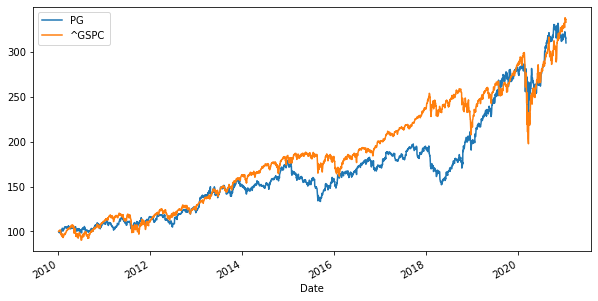

In [402]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [403]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [404]:
log_returns.mean() * 250 

PG       0.101696
^GSPC    0.108149
dtype: float64

In [405]:
log_returns.cov() * 250 

,PG,^GSPC
PG,0.029148,0.017778
^GSPC,0.017778,0.030540


In [406]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.595866
^GSPC,0.595866,1.000000


In [407]:
num_assets = len(assets)

In [408]:
num_assets

2

In [409]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.89405842, 0.10594158])

In [410]:
weights[0] + weights[1]

1.0

In [411]:
pfolio_returns = []
pfolio_vola = []


In [412]:
# Finding the efficent frontier for many allocations of a portfoilio with 2 stocks 

#for x in range(1000):
 #   weights = np.random.random(num_assets)
  #  weights /= np.sum(weights)
   # pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    #pfolio_vola.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

#pfolio_returns = np.array(pfolio_returns)
#pfolio_vola = np.array(pfolio_vola)
    
#pfolio_returns, pfolio_vola

In [413]:
data = pd.read_excel(r"C:\Users\alexa\OneDrive\Desktop\Housing.xlsx")

In [414]:
data = data[["House Price", "House Size (sq.ft.)"]]

In [415]:
data.head()

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270


In [416]:
x = data["House Size (sq.ft.)"]
y = data["House Price"]

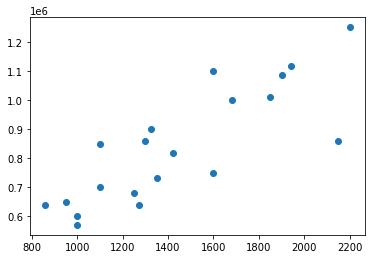

In [417]:
plt.scatter(x, y)
plt.show()

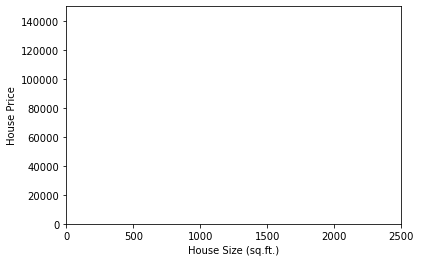

In [418]:
plt.scatter(x,y)
plt.axis([0, 2500, 0, 150000])
plt.ylabel("House Price")
plt.xlabel("House Size (sq.ft.)")
plt.show()

In [419]:
X1 = sm.add_constant(x)
reg = sm.OLS(y, X1).fit()

In [420]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           8.13e-06
Time:                        21:43:46   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [421]:
# Finding Beta of a stock 
assets = ['BB', '^GSPC']
data = pd.DataFrame()
import yfinance as yf

data = yf.download(assets, start = "2012-01-01", end = "2016-12-31")["Adj Close"]
data.tail()

[*********************100%***********************]  2 of 2 completed


,BB,^GSPC
Date,,
2016-12-23,7.02,2263.790039
2016-12-27,7.08,2268.879883
2016-12-28,7.00,2249.919922
2016-12-29,6.95,2249.260010
2016-12-30,6.89,2238.830078


In [422]:
sec_returns = np.log( data / data.shift(1))

In [423]:
cov = sec_returns.cov() * 250 
cov

,BB,^GSPC
BB,0.296517,0.018050
^GSPC,0.018050,0.016362


In [424]:
cov_with_market = cov.iloc[0, 1]
cov_with_market

0.01804992026880292

In [425]:
market_var = sec_returns['^GSPC'].var() * 250 
market_var


0.016361631002308474

In [426]:
#The value of beta, so its a defensive stock. 
PG_Beta = cov_with_market/market_var
PG_Beta

1.1031858783672757

In [427]:
# Calculating the sharpe ratio
Sharpe = (PG_Beta * 0.05) / (sec_returns['BB'].std() * 250 ** 0.5)
Sharpe

0.10129630803464884

In [428]:
#Monte Carlo Simulation Testing, I get very stuck later on. 
import pandas as pd
import numpy as np 
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
ticker = 'PG'
MCS = yf.download(ticker, start = "2007-01-01", end = "2016-12-31")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [429]:
log_returns = np.log(1 + MCS.pct_change())

In [430]:
log_returns.tail()

Date
2016-12-23    0.005784
2016-12-27   -0.004247
2016-12-28   -0.006284
2016-12-29    0.003325
2016-12-30   -0.003206
Name: Adj Close, dtype: float64

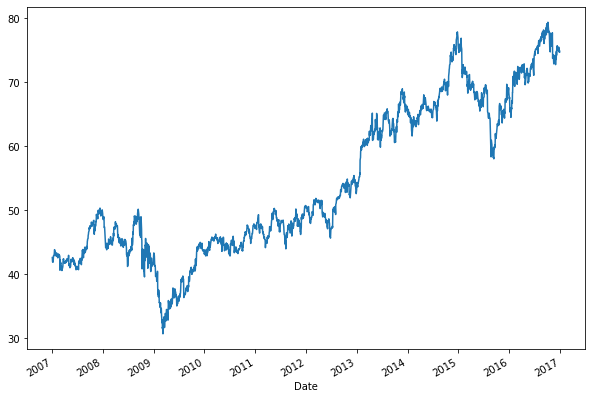

In [431]:
MCS.plot(figsize = (10, 7));

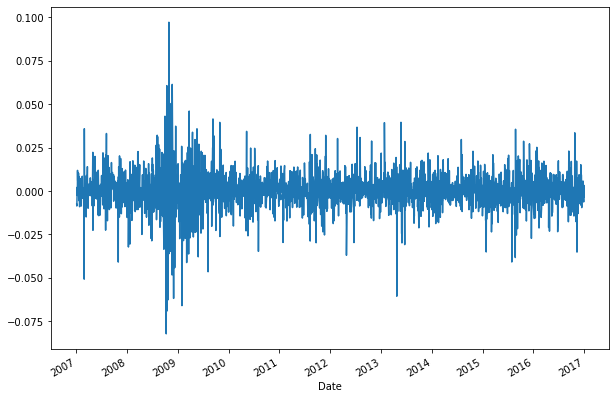

In [432]:
log_returns.plot(figsize = (10, 7));

In [433]:
u = log_returns.mean()

In [434]:
var = log_returns.var()

In [435]:
#Calculate Browinian motion drift
drift = u - (0.5 * var)
drift

0.00016014144771558727

In [436]:
stdev = log_returns.std()
stdev

0.011219568382008917

In [446]:
drift.values

AttributeError: 'float' object has no attribute 'values'

In [438]:
np.array([stdev])

array([0.01121957])

In [439]:
type(drift)

float

In [440]:
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

In [441]:
x = np.random.rand(10, 2)
x

array([[0.26379454, 0.30222949],
       [0.88364671, 0.98747213],
       [0.79927363, 0.34214098],
       [0.82525591, 0.63749042],
       [0.06300242, 0.02574284],
       [0.71691236, 0.32601842],
       [0.81207867, 0.44875171],
       [0.83194978, 0.76771965],
       [0.79231726, 0.3531316 ],
       [0.59015537, 0.55699694]])

In [442]:
norm.ppf(x)

array([[-0.6316906 , -0.51799898],
       [ 1.19341577,  2.24054214],
       [ 0.83902953, -0.40662699],
       [ 0.9355825 ,  0.35175881],
       [-1.530048  , -1.94740939],
       [ 0.57369341, -0.45093439],
       [ 0.88558229, -0.12881578],
       [ 0.9618988 ,  0.7313577 ],
       [ 0.81448794, -0.37687944],
       [ 0.22794466,  0.14335967]])

In [443]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.73472769, -0.58813763],
       [ 2.05225528,  1.52596626],
       [-1.1745651 ,  1.23803131],
       [ 0.40306033,  0.04169829],
       [-0.42032921, -1.21477607],
       [-1.00986013, -0.1728711 ],
       [ 1.50203301,  0.55167544],
       [ 0.7356177 ,  1.04866003],
       [ 0.53915474,  2.16376118],
       [-0.13939142,  0.25328244]])

In [444]:
t_intervals = 1000
iterations = 10

In [445]:
daily_returns = np.exp(drift.values + stdev.to_numpy * norm.ppf(np.random.rand(t_intervals, iterations)))

AttributeError: 'float' object has no attribute 'to_numpy'